<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Selecting-Aves-samples" data-toc-modified-id="Selecting-Aves-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selecting Aves samples</a></span><ul class="toc-item"><li><span><a href="#summary" data-toc-modified-id="summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>summary</a></span></li></ul></li><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-assembled-&amp;-clustered" data-toc-modified-id="Number-of-genes-assembled-&amp;-clustered-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Number of genes assembled &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>COG functional categories</a></span><ul class="toc-item"><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-6.3.1.1"><span class="toc-item-num">6.3.1.1&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-Taxonomy" data-toc-modified-id="By-Taxonomy-6.4.1.1"><span class="toc-item-num">6.4.1.1&nbsp;&nbsp;</span>By Taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Metagenome assembly of Aves samples
  * assemblying genes by using `plass`

# Var

In [4]:
work_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_ave/LLMGAG/'

samples_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples_cov-gte0.3.tsv'
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmgag/'


# Init

In [5]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

# Selecting Aves samples

In [6]:
meta = read.delim(metadata_file, sep='\t') %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name, diet, habitat)
meta %>% dfhead

[1] 475   8


SampleID,class,order,family,genus,scientific_name,diet,habitat
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,omnivore,aquatic habitat
F35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat
F36_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat


In [7]:
samps = read.delim(samples_file, sep='\t') %>%
    mutate(Sample = gsub('^XF', 'F', Sample))
samps %>% dfhead

[1] 291   6


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510


In [8]:
# checking overlap
setdiff(samps$Sample, meta$Sample)

[1] "unassigned"

In [9]:
# joining
samps = samps %>%
    inner_join(meta, c('Sample'='SampleID')) 

samps %>% dfhead

Warning message:
“Column `Sample`/`SampleID` joining character vector and factor, coercing into character vector”

[1] 290  13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854,Mammalia,Artiodactyla,Bovidae,Bos,Bos_taurus,herbivore,terrestrial habitat
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta_africana,herbivore,terrestrial habitat
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510,Mammalia,Carnivora,Mustelidae,Lutra,Lutra_lutra,carnivore,terrestrial habitat


In [10]:
# all metadata 
samps %>%
    group_by(class) %>%
    summarize(n = n()) %>%
    ungroup()

class,n
Actinopterygii,27
Amphibia,8
Aves,63
Mammalia,179
Reptilia,13


In [11]:
samps_f = samps %>%
    filter(class == 'Aves') 

samps_f %>% dfhead

[1] 63 13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X267_Rook,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X267_Rook/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X267_Rook/R2_final.fq.gz,1052576,0.3247944,20.24480,Aves,Passeriformes,Corvidae,Corvus,Corvus_frugilegus,omnivore,terrestrial habitat
X174_Great_Tit,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X174_Great_Tit/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X174_Great_Tit/R2_final.fq.gz,1801813,0.3666125,20.09565,Aves,Passeriformes,Paridae,Parus,Parus_major,omnivore,terrestrial habitat
X34_Mallard_Duck,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X34_Mallard_Duck/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X34_Mallard_Duck/R2_final.fq.gz,1347498,0.3926242,20.00723,Aves,Anseriformes,Anatidae,Anas,Anas_platyrhynchos,omnivore,terrestrial habitat


In [10]:
outF = file.path(work_dir, 'samples_ave.tsv')
samps_f %>%
    arrange(class, order, family, genus) %>%
    write.table(outF, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_ave/LLMGAG//samples_ave.tsv 


## summary

In [11]:
samps_f$Total.Sequences %>% summary

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  185471  1128996  2073745  3607349  3855874 29710937 

# LLMGAG 

In [12]:
F = file.path(work_dir, 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_ave/LLMGAG/samples_ave.tsv

# output location
output_dir: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_ave/LLMGAG/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog.db
eggnog_og2lev_db: /ebio/abt3_projects/databases_no-backup/Eggnog/og2level.tsv.gz
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_di

## Run

```{bash}
(snakemake_dev) @ rick:/ebio/abt3_projects/vadinCA11/bin/llmgag
$ screen -L -S llmgag-ga-ave ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_ave/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_ave/LLMGAG/SGE_log 24
```

In [3]:
pipelineInfo(pipeline_dir)

LLMGAG

Ley Lab Metagenome Assembly of Genes (LLMGAG)

* Version: 0.1.3
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/annotate.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- pigz
- bioconda::fasta-splitter
- bioconda::eggnog-mapper

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/checkm.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/das_tool.yaml <==
channels: !!python/tuple
- r
- bioconda
dependencies:
- pigz
- ruby
- r::r-base
- r::r-data.table
- r::r-domc
- r::r-ggplot2
- bioconda::pullseq
- bioconda::prodigal
- bioconda::blast
- bioconda::diamond
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/dask.yaml <==
channels: !!python/tuple
- co

# Summary

## Number of genes assembled & clustered

In [12]:
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of assembled sequences:', n_raw_seqs, '\n')

Number of assembled sequences: 53270560 


In [13]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 6970073 


In [14]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 1648787 


## Taxonomy

In [15]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':')
tax %>% dfhead

Warning message:
“Expected 7 pieces. Additional pieces discarded in 126610 rows [137, 148, 196, 225, 314, 360, 434, 444, 453, 462, 464, 473, 517, 638, 748, 975, 981, 1010, 1044, 1108, ...].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 2450744 rows [1, 2, 3, 20, 21, 23, 24, 25, 26, 27, 28, 29, 43, 44, 46, 47, 48, 49, 61, 69, ...].”

[1] 6970073      11


seqID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
2ed8af508b6842449585442b72706510,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
8417c036a6a540509c47a06aa142d86b,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
3ec5ccd0da0f44e5ab6a073c1175bf9b,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


In [16]:
# number of sequences
tax$seqID %>% unique %>% length %>% print

[1] 6970073


In [17]:
# which ranks found?
tax$rank %>% table %>% print

.
           class           cohort           family            forma 
            6368               33             6438              161 
           genus       infraclass       infraorder          kingdom 
            7070             1315               10               83 
         no rank            order        parvorder           phylum 
         3756947             6976                7             7918 
         species    species group species subgroup         subclass 
         3041632              447               73              100 
       subfamily         subgenus       subkingdom         suborder 
             101               13               40               42 
       subphylum       subspecies         subtribe       superclass 
              52           123084               74               23 
     superfamily     superkingdom       superorder            tribe 
              10             7947              106              128 
        varietas 
            28

In [18]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

### Summary

In [19]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 206   3


Domain,Phylum,n
Fungi,Ascomycota,95383
Fungi,Basidiomycota,6047
Fungi,Blastocladiomycota,51


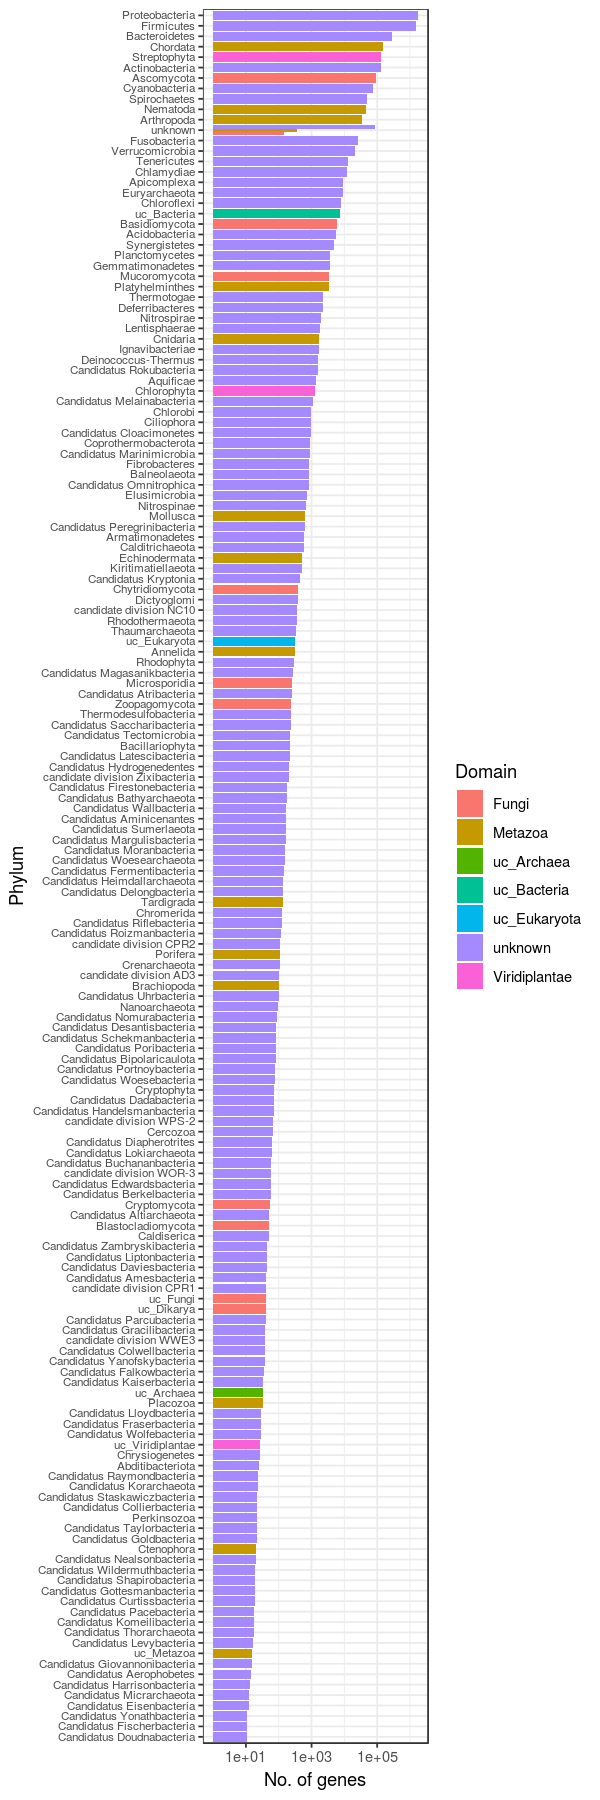

In [20]:
# plotting by phylum
p = tax_s %>%
    filter(n > 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(5,15)
plot(p)

In [21]:
# top phyla
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,n
unknown,Proteobacteria,1736405
unknown,Firmicutes,1528971
unknown,Bacteroidetes,273987
Metazoa,Chordata,150097
Viridiplantae,Streptophyta,134478
unknown,Actinobacteria,131465
Fungi,Ascomycota,95383
unknown,unknown,84275
unknown,Cyanobacteria,75993
unknown,Spirochaetes,48378


In [22]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 441   4


Domain,Phylum,Class,n
Fungi,Ascomycota,Archaeorhizomycetes,1
Fungi,Ascomycota,Arthoniomycetes,10
Fungi,Ascomycota,Candelariomycetes,1


In [23]:
# top hits
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,Class,n
unknown,Proteobacteria,Gammaproteobacteria,1486294
unknown,Firmicutes,Clostridia,957637
unknown,Firmicutes,Bacilli,456354
unknown,Bacteroidetes,Bacteroidia,152030
Metazoa,Chordata,Aves,132864
unknown,Actinobacteria,Actinobacteria,101256
unknown,Proteobacteria,Betaproteobacteria,90129
Viridiplantae,Streptophyta,Liliopsida,87833
unknown,unknown,unknown,82816
unknown,Proteobacteria,Alphaproteobacteria,81168


## Annotations

In [24]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd, sep='\t') %>%
  dplyr::select(-V6)
emap_annot %>% dfhead

[1] 4428421      12


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V13
f496519ee97b4adcb1facfb3082e08ea,272563.CD3501,5.2e-21,104.8,MFD,K03723,,bactNOG[38],"08JA2@bactNOG,0F7A6@cloNOG,0P6IH@firmNOG,COG1197@NOG",NA|NA|NA,L,transcription-repair coupling factor
b745096e15cb422395892312ee1390b8,1042163.BRLA_c23900,1.2e-55,221.5,CBC4_0930,K07487,,bactNOG[38],"04V00@bacNOG,05MKN@bactNOG,0NFDQ@firmNOG,COG3666@NOG",NA|NA|NA,L,Transposase
e807115d26de4c33aaaf52dbe141fa4d,596330.HMPREF0628_1296,9.0e-29,131.3,METE,K00549,,bactNOG[38],"07RZ4@bactNOG,0EQUY@cloNOG,0ND96@firmNOG,COG0620@NOG",NA|NA|NA,E,"methionine synthase, vitamin-B12 independent"


In [25]:
# adding taxonomy info
intersect(emap_annot$V1, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('V1'='seqID'))

emap_annot %>% dfhead

[1] 4428421
[1] 4428421      22


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
f496519ee97b4adcb1facfb3082e08ea,272563.CD3501,5.2e-21,104.8,MFD,K03723,,bactNOG[38],"08JA2@bactNOG,0F7A6@cloNOG,0P6IH@firmNOG,COG1197@NOG",NA|NA|NA,⋯,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
b745096e15cb422395892312ee1390b8,1042163.BRLA_c23900,1.2e-55,221.5,CBC4_0930,K07487,,bactNOG[38],"04V00@bacNOG,05MKN@bactNOG,0NFDQ@firmNOG,COG3666@NOG",NA|NA|NA,⋯,1105031,species,Clostridium sp. MSTE9,unknown,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium,Clostridium sp. MSTE9
e807115d26de4c33aaaf52dbe141fa4d,596330.HMPREF0628_1296,9.0e-29,131.3,METE,K00549,,bactNOG[38],"07RZ4@bactNOG,0EQUY@cloNOG,0ND96@firmNOG,COG0620@NOG",NA|NA|NA,⋯,1423813,no rank,Lactobacillus vaccinostercus DSM 20634,unknown,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus vaccinostercus


In [26]:
n_annot_seqs = emap_annot$V1 %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 4428421 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [27]:
# summarizing by functional group
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 4428421 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 4268132       2


V1,COG_func_cat
f496519ee97b4adcb1facfb3082e08ea,L
b745096e15cb422395892312ee1390b8,L
e807115d26de4c33aaaf52dbe141fa4d,E


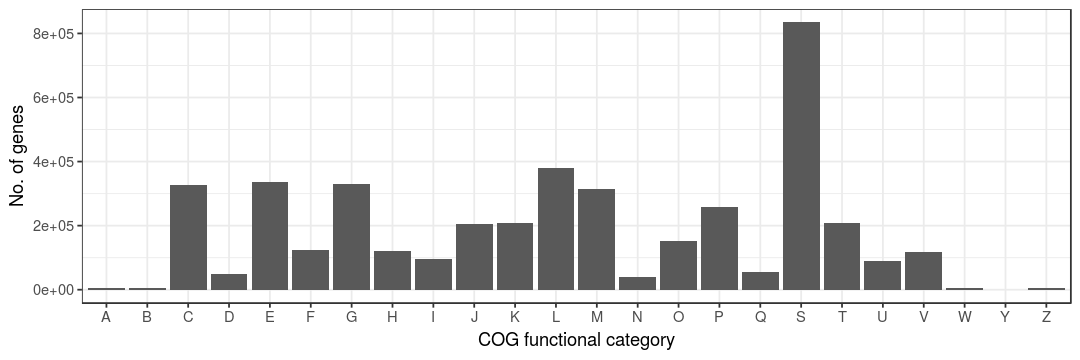

In [28]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,3)
plot(p)

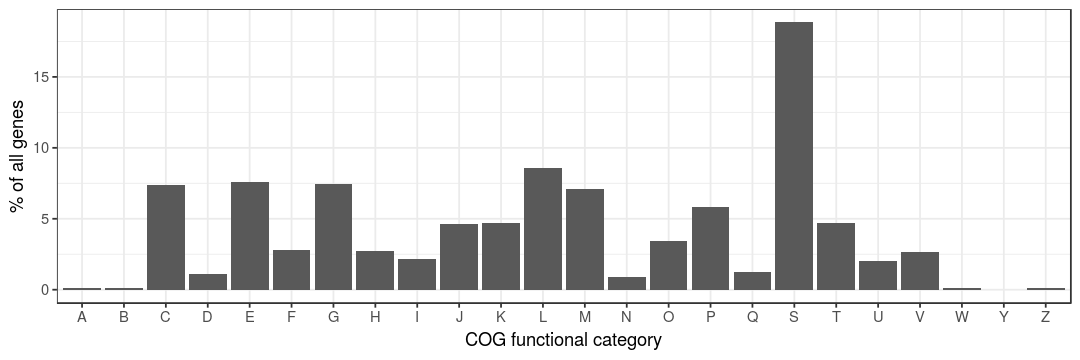

In [29]:
# plotting summary
p = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup() %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

dims(9,3)
plot(p)

#### Grouped by taxonomy

In [30]:
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    left_join(tax, c('V1'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 4428421 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 4268132      12


V1,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
f496519ee97b4adcb1facfb3082e08ea,L,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
b745096e15cb422395892312ee1390b8,L,1105031,species,Clostridium sp. MSTE9,unknown,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium,Clostridium sp. MSTE9
e807115d26de4c33aaaf52dbe141fa4d,E,1423813,no rank,Lactobacillus vaccinostercus DSM 20634,unknown,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus vaccinostercus


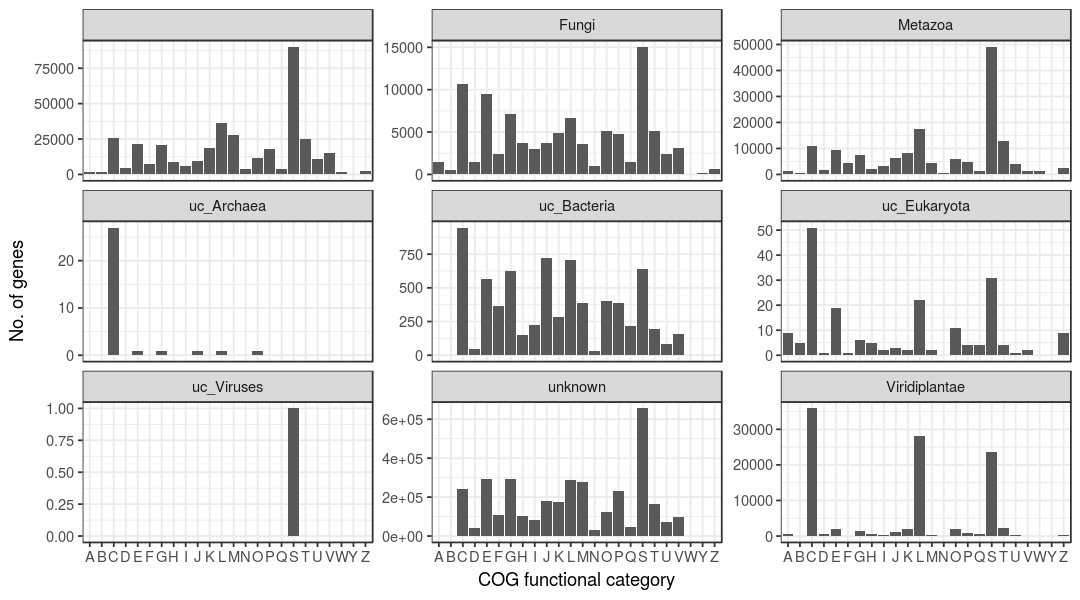

In [31]:
# plotting summary by domain
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,5)
plot(p)

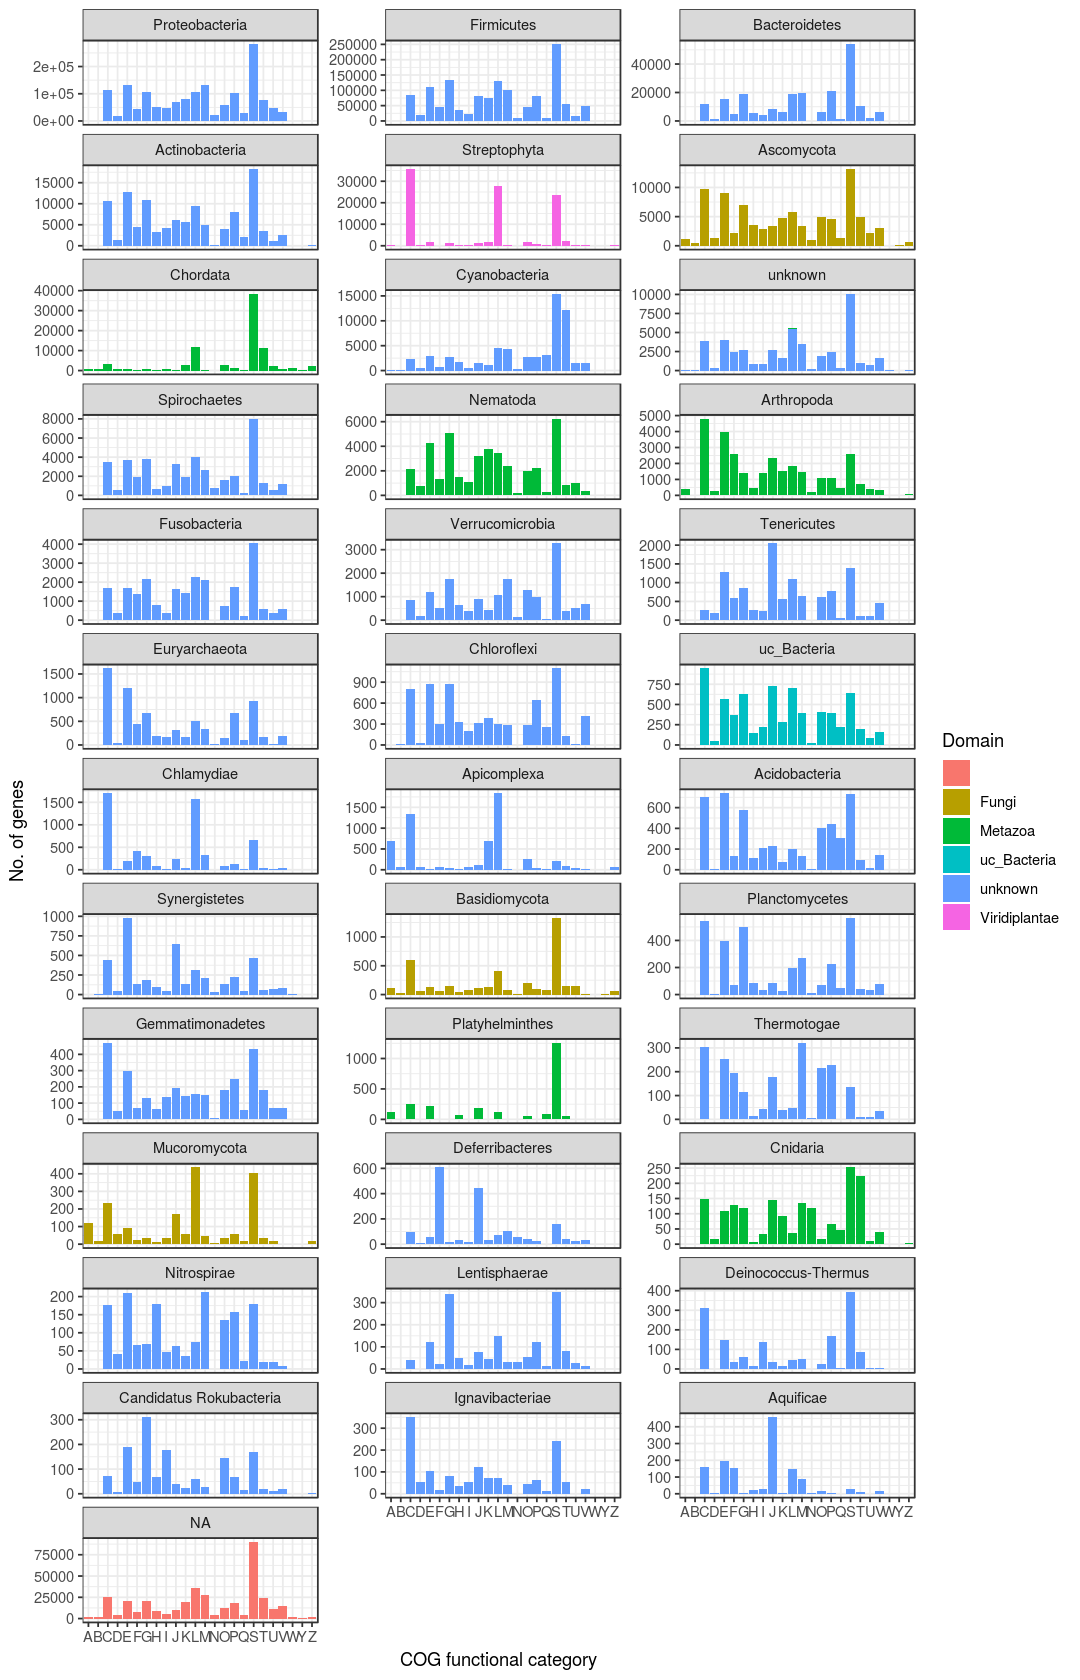

In [32]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 1000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=Domain)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,14)
plot(p)

## humann2 db genes

In [33]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 %>% dfhead

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 128016 rows [1, 5, 7, 14, 17, 20, 21, 38, 68, 118, 138, 167, 169, 327, 339, 347, 350, 359, 405, 476, ...].”

[1] 1648787       6


original_name,UniRefID,Gene_length,Genus,Species,TaxID
060925bac1ea47edaee21a6711a733e2,UniRef50_H2PXD1,73,unclassified,unclassified,NA
3b228ebbf5d648128b60b687f355a3ac,UniRef50_T2RD60,157,unclassified,unclassified,500633
58074fb0828a476eb7efe4971a1273ac,UniRef50_X0PQW4,268,Lactobacillus,Lactobacillus_aviarius,1606


In [34]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID'))

hm2 %>% dfhead

[1] 1648787
[1] 1648787      16


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
060925bac1ea47edaee21a6711a733e2,UniRef50_H2PXD1,73,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
3b228ebbf5d648128b60b687f355a3ac,UniRef50_T2RD60,157,unclassified,unclassified,500633,500633,no rank,[Clostridium] hiranonis DSM 13275,unknown,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,unknown,[Clostridium] hiranonis
58074fb0828a476eb7efe4971a1273ac,UniRef50_X0PQW4,268,Lactobacillus,Lactobacillus_aviarius,1606,1606,species,Lactobacillus aviarius,unknown,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus aviarius


### Summary

In [35]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 258190

In [36]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_G7PJK4,1895
UniRef50_G7PZX1,1445
UniRef50_G3URB3,487
UniRef50_G7P3W5,362
UniRef50_A0A011B1A2,294
UniRef50_H2PXD1,288
UniRef50_Q5HRK4,267
UniRef50_E0XTF9,265
UniRef50_U3HZS9,265
UniRef50_R5NSN2,240


In [37]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 1520771

#### By Taxonomy

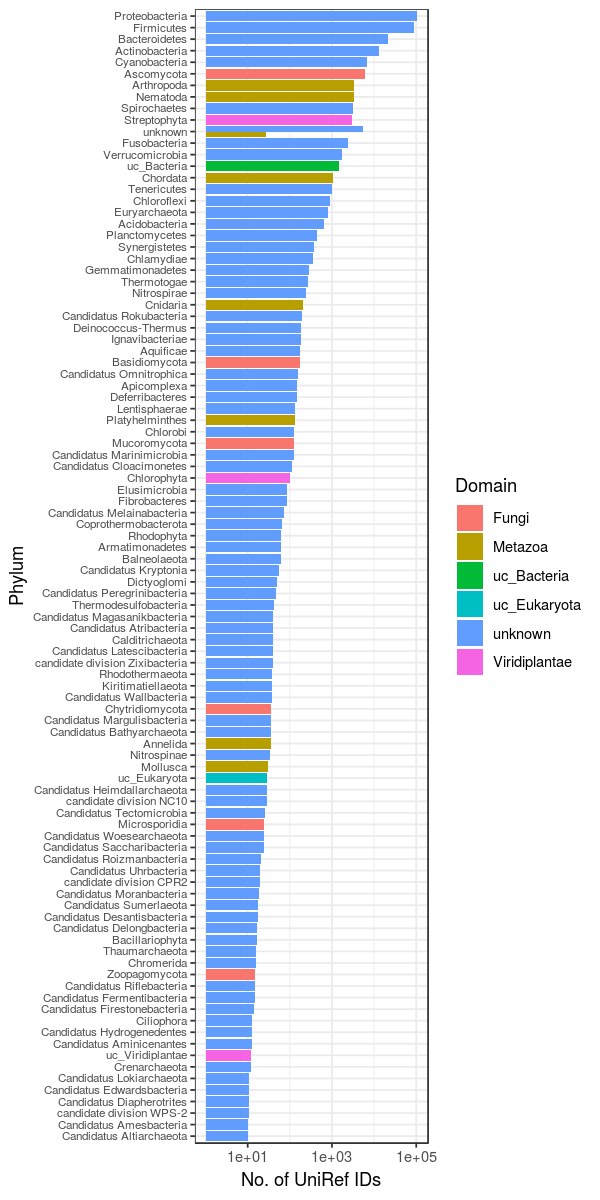

In [38]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )
    
dims(5,10)
plot(p)

# sessionInfo

In [39]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec